In [1]:
from PIL import Image
%matplotlib inline

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
from IPython.display import display, HTML

In [4]:
import glob

## Not Important Stuff

In [10]:
fname = glob.glob('Train/*.jpg')

In [11]:
def open_image(fn): return np.array(Image.open(fn).resize(img_size), Image.NEAREST)

In [12]:
import matplotlib.pylab as pl

In [13]:
import pandas as pd

In [14]:
train = pd.read_csv('Train/train.csv')

In [31]:
train.columns[1:]

Index([u'adult_males', u'subadult_males', u'adult_females', u'juveniles',
       u'pups'],
      dtype='object')

In [16]:
cord = pd.read_csv('coords.csv')

In [17]:
cord.columns

Index([u'tid', u'cls', u'row', u'col'], dtype='object')

In [19]:
cor = cord[cord.tid==47]

## Coding Labels & Colors

In [6]:
seals = ['adult_males', 'subadult males', 'adult females', 'juveniles', 'pups']
code = [(243,8,5), (244,8,242), (87,46,10), (25,56,176), (38,174,21)]  
cls = [0, 1, 2, 3, 4]
hex = ['#f30805', '#f408f2', '#572e0a', '#1938b0', '#26ae15']

In [7]:
id2code = dict(zip(seals,code))
cls2rgb = dict(zip(cls, code))
cls2hex = dict(zip(cls, hex))
seals2cls = dict(zip(seals,cls))
cls2seals = dict(zip(cls,seals))

In [8]:
id2code,cls2rgb,cls2hex, seals2cls, cls2seals

({'adult females': (87, 46, 10),
  'adult_males': (243, 8, 5),
  'juveniles': (25, 56, 176),
  'pups': (38, 174, 21),
  'subadult males': (244, 8, 242)},
 {0: (243, 8, 5),
  1: (244, 8, 242),
  2: (87, 46, 10),
  3: (25, 56, 176),
  4: (38, 174, 21)},
 {0: '#f30805', 1: '#f408f2', 2: '#572e0a', 3: '#1938b0', 4: '#26ae15'},
 {'adult females': 2,
  'adult_males': 0,
  'juveniles': 3,
  'pups': 4,
  'subadult males': 1},
 {0: 'adult_males',
  1: 'subadult males',
  2: 'adult females',
  3: 'juveniles',
  4: 'pups'})

#### Dictionary
adult males = (243,8,5),          # red

subadult males = (244,8,242),        # magenta

adult females = (87,46,10),         # brown 

juveniles = (25,56,176),        # blue

pups = (38,174,21),        # green


## Plotting Cordinates 
Cordinates used from https://github.com/gecrooks/sealionengine

In [34]:
def draw(x):
    plt.scatter([x['col']],[x['row']],s=20,c=cls2hex[x['cls']])

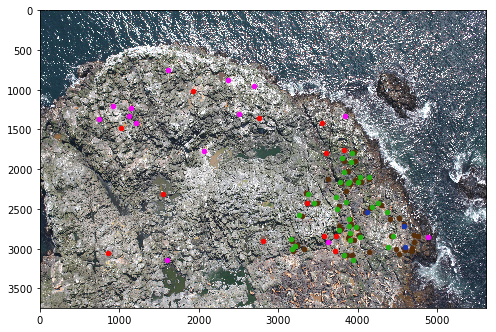

In [35]:
plt.figure(figsize = (8,8))
img = plt.imread(fname[0])
plt.imshow(img)
cor.apply(draw, axis=1)
# plt.scatter( [1931], [1020], s=100,c=cls2hex[0])#col*rows
plt.show()

I am thinking  of using the below image as target as we just want the count.

In [42]:
def draw(x):
    plt.scatter([x['col']],[x['row']],s=20,c=cls2hex[x['cls']])

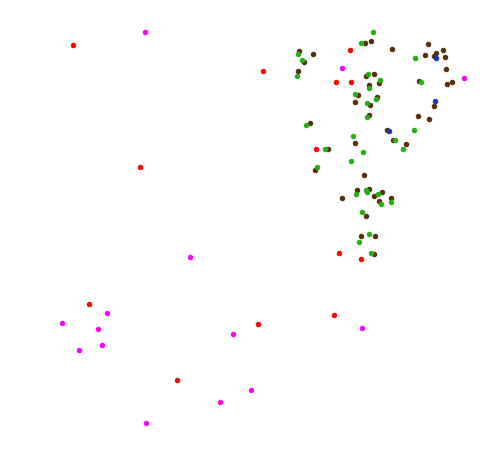

In [48]:
plt.figure(figsize = (8,8))
cor.apply(draw, axis=1)
plt.axis('off')
# plt.scatter( [1931], [1020], s=100,c=cls2hex[0])#col*rows
plt.savefig('fig.png', dpi=45) #dpi=45 => 360*360
plt.show()

## Cross-checking cordinates with train.csv

In [186]:
for i in range(len(train)):
    cor =cord[cord.tid==i]
    df = train.iloc[:,1:][train.train_id == i]
    display(df)
    print ('----------------------------------------')
    hash = dict(cor.cls.value_counts())
    for key in hash.keys():
        print(str(cls2seals[key])+' : '+str(hash[key]))
    print ('-----------------------------------------')

,adult_males,subadult_males,adult_females,juveniles,pups
0,62,12,486,42,344


----------------------------------------
adult_males : 62
subadult males : 12
adult females : 486
juveniles : 42
pups : 344
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
1,2,20,0,12,0


----------------------------------------
adult_males : 2
subadult males : 20
juveniles : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
2,2,0,38,20,0


----------------------------------------
adult_males : 2
adult females : 37
juveniles : 19
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
3,8,5,41,7,38


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
4,6,9,2,0,0


----------------------------------------
adult_males : 6
subadult males : 9
adult females : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
5,6,4,14,4,19


----------------------------------------
adult_males : 6
subadult males : 4
adult females : 14
juveniles : 4
pups : 19
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
6,2,5,20,18,0


----------------------------------------
adult_males : 2
subadult males : 5
adult females : 20
juveniles : 18
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
7,6,2,33,16,3


----------------------------------------
adult_males : 6
subadult males : 2
adult females : 33
juveniles : 16
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
8,9,5,76,4,51


----------------------------------------
adult_males : 9
subadult males : 5
adult females : 76
juveniles : 4
pups : 51
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
9,4,1,64,36,11


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
10,5,4,7,5,0


----------------------------------------
adult_males : 5
subadult males : 4
adult females : 7
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
11,3,7,36,13,0


----------------------------------------
adult_males : 3
subadult males : 5
adult females : 36
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
12,8,9,13,1,7


----------------------------------------
adult_males : 8
subadult males : 9
adult females : 13
juveniles : 1
pups : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
13,2,5,20,13,0


----------------------------------------
adult_males : 1
subadult males : 5
adult females : 20
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
14,1,1,0,27,0


----------------------------------------
adult_males : 1
subadult males : 1
juveniles : 27
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
15,2,3,35,61,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 33
juveniles : 56
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
16,1,1,32,35,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 32
juveniles : 35
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
17,4,4,60,18,0


----------------------------------------
adult_males : 4
subadult males : 4
adult females : 60
juveniles : 18
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
18,2,4,0,0,0


----------------------------------------
adult_males : 2
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
19,7,3,34,24,1


----------------------------------------
adult_males : 7
subadult males : 3
adult females : 34
juveniles : 24
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
20,7,21,31,4,1


----------------------------------------
adult_males : 7
subadult males : 21
adult females : 31
juveniles : 4
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
21,6,1,25,9,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
22,1,1,0,5,0


----------------------------------------
adult_males : 1
subadult males : 1
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
23,1,0,1,6,0


----------------------------------------
adult_males : 1
adult females : 1
juveniles : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
24,4,2,0,0,0


----------------------------------------
adult_males : 4
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
25,1,2,0,0,0


----------------------------------------
adult_males : 1
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
26,0,8,0,4,0


----------------------------------------
subadult males : 8
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
27,1,4,0,8,0


----------------------------------------
adult_males : 1
subadult males : 4
juveniles : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
28,2,0,0,0,0


----------------------------------------
adult_males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
29,4,4,44,15,0


----------------------------------------
adult_males : 4
subadult males : 4
adult females : 44
juveniles : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
30,2,0,1,3,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
31,3,2,20,76,1


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 20
juveniles : 76
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
32,18,6,159,18,111


----------------------------------------
adult_males : 18
subadult males : 6
adult females : 159
juveniles : 18
pups : 111
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
33,0,1,18,8,0


----------------------------------------
subadult males : 1
adult females : 18
juveniles : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
34,4,1,127,237,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
35,4,1,0,0,0


----------------------------------------
adult_males : 4
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
36,9,19,0,0,0


----------------------------------------
adult_males : 8
subadult males : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
37,1,2,5,0,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
38,3,0,36,2,0


----------------------------------------
adult_males : 3
adult females : 33
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
39,10,14,62,10,15


----------------------------------------
adult_males : 10
subadult males : 14
adult females : 62
juveniles : 10
pups : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
40,2,2,63,8,0


----------------------------------------
adult_males : 2
subadult males : 2
adult females : 62
juveniles : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
41,15,0,85,18,59


----------------------------------------
adult_males : 15
adult females : 85
juveniles : 18
pups : 59
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
42,7,4,10,1,0


----------------------------------------
adult_males : 7
subadult males : 4
adult females : 10
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
43,28,4,338,47,189


----------------------------------------
adult_males : 28
subadult males : 4
adult females : 338
juveniles : 47
pups : 189
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
44,3,2,25,15,0


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 25
juveniles : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
45,4,7,100,27,0


----------------------------------------
adult_males : 4
subadult males : 7
adult females : 100
juveniles : 27
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
46,1,4,0,0,0


----------------------------------------
adult_males : 1
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
47,13,16,48,3,33


----------------------------------------
adult_males : 13
subadult males : 14
adult females : 48
juveniles : 3
pups : 33
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
48,5,10,66,24,0


----------------------------------------
adult_males : 5
subadult males : 10
adult females : 66
juveniles : 24
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
49,0,0,4,15,0


----------------------------------------
adult females : 4
juveniles : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
50,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
51,9,13,10,35,0


----------------------------------------
adult_males : 9
subadult males : 13
adult females : 10
juveniles : 35
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
52,3,3,20,23,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 20
juveniles : 23
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
53,2,1,15,6,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 15
juveniles : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
54,2,5,22,26,0


----------------------------------------
adult_males : 2
subadult males : 5
adult females : 22
juveniles : 26
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
55,6,2,59,74,0


----------------------------------------
adult_males : 6
subadult males : 2
adult females : 59
juveniles : 74
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
56,9,3,91,5,93


----------------------------------------
adult_males : 9
subadult males : 3
adult females : 91
juveniles : 5
pups : 93
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
57,2,1,0,0,0


----------------------------------------
adult_males : 2
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
58,36,17,143,71,145


----------------------------------------
adult_males : 38
subadult males : 17
adult females : 143
juveniles : 71
pups : 145
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
59,6,4,16,55,1


----------------------------------------
adult_males : 6
subadult males : 4
adult females : 16
juveniles : 55
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
60,5,4,0,0,0


----------------------------------------
adult_males : 5
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
61,0,0,1,0,0


----------------------------------------
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
62,6,2,222,28,1


----------------------------------------
adult_males : 6
subadult males : 2
adult females : 221
juveniles : 28
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
63,7,22,58,15,60


----------------------------------------
adult_males : 7
subadult males : 22
adult females : 58
juveniles : 15
pups : 59
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
64,5,5,6,0,0


----------------------------------------
adult_males : 5
subadult males : 5
adult females : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
65,29,8,267,14,270


----------------------------------------
adult_males : 29
subadult males : 8
adult females : 267
juveniles : 14
pups : 270
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
66,0,0,0,0,0


----------------------------------------
adult_males : 9
subadult males : 5
adult females : 23
juveniles : 17
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
67,10,7,30,4,26


----------------------------------------
adult_males : 9
subadult males : 3
adult females : 30
juveniles : 4
pups : 25
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
68,4,3,3,0,0


----------------------------------------
adult_males : 4
subadult males : 3
adult females : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
69,4,2,46,31,14


----------------------------------------
adult_males : 4
subadult males : 2
adult females : 46
juveniles : 31
pups : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
70,9,11,15,636,0


----------------------------------------
adult_males : 9
subadult males : 11
adult females : 15
juveniles : 636
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
71,3,2,21,18,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
72,13,3,56,37,20


----------------------------------------
adult_males : 13
subadult males : 3
adult females : 56
juveniles : 37
pups : 20
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
73,3,0,20,6,8


----------------------------------------
adult_males : 3
adult females : 20
juveniles : 6
pups : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
74,1,2,0,4,0


----------------------------------------
adult_males : 1
subadult males : 2
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
75,3,1,0,34,0


----------------------------------------
adult_males : 3
subadult males : 1
juveniles : 34
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
76,5,3,0,0,0


----------------------------------------
adult_males : 5
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
77,20,11,136,37,84


----------------------------------------
adult_males : 19
subadult males : 11
adult females : 136
juveniles : 37
pups : 83
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
78,2,2,6,0,5


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 6
pups : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
79,11,5,37,0,26


----------------------------------------
adult_males : 11
subadult males : 5
adult females : 37
pups : 26
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
80,0,12,0,19,0


----------------------------------------
subadult males : 11
adult females : 1
juveniles : 19
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
81,1,3,15,0,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
82,0,0,37,17,0


----------------------------------------
adult females : 37
juveniles : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
83,5,2,44,44,0


----------------------------------------
adult_males : 5
subadult males : 2
adult females : 44
juveniles : 41
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
84,1,1,0,12,0


----------------------------------------
adult_males : 1
subadult males : 1
juveniles : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
85,0,1,0,0,0


----------------------------------------
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
86,2,2,4,2,2


----------------------------------------
adult_males : 2
subadult males : 2
adult females : 4
juveniles : 2
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
87,7,1,43,16,0


----------------------------------------
adult_males : 7
subadult males : 1
adult females : 41
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
88,1,2,1,24,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 1
juveniles : 24
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
89,1,1,1,0,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
90,1,0,17,12,0


----------------------------------------
adult_males : 1
adult females : 17
juveniles : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
91,17,0,229,1,157


----------------------------------------
adult_males : 17
adult females : 229
juveniles : 1
pups : 156
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
92,3,5,1,1,1


----------------------------------------
adult_males : 3
subadult males : 5
adult females : 1
juveniles : 1
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
93,24,21,144,99,62


----------------------------------------
adult_males : 23
subadult males : 21
adult females : 144
juveniles : 100
pups : 62
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
94,4,4,17,0,0


----------------------------------------
adult_males : 4
subadult males : 4
adult females : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
95,5,0,19,58,0


----------------------------------------
adult_males : 5
adult females : 19
juveniles : 58
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
96,9,3,167,5,0


----------------------------------------
adult_males : 9
subadult males : 3
adult females : 167
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
97,0,0,19,11,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
98,0,6,0,0,0


----------------------------------------
subadult males : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
99,3,1,13,68,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 11
juveniles : 68
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
100,12,3,50,4,27


----------------------------------------
adult_males : 12
subadult males : 3
adult females : 50
juveniles : 3
pups : 27
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
101,10,0,85,56,0


----------------------------------------
adult_males : 10
adult females : 85
juveniles : 56
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
102,13,0,92,3,73


----------------------------------------
adult_males : 13
adult females : 92
juveniles : 3
pups : 73
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
103,3,0,0,0,0


----------------------------------------
adult_males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
104,3,3,38,43,0


----------------------------------------
adult_males : 3
subadult males : 3
adult females : 38
juveniles : 42
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
105,2,0,33,17,3


----------------------------------------
adult_males : 2
adult females : 32
juveniles : 13
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
106,0,4,0,5,0


----------------------------------------
subadult males : 4
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
107,7,11,3,1,2


----------------------------------------
adult_males : 7
subadult males : 11
adult females : 3
juveniles : 1
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
108,4,4,0,3,0


----------------------------------------
adult_males : 3
subadult males : 4
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
109,4,2,35,4,27


----------------------------------------
adult_males : 4
subadult males : 2
adult females : 35
juveniles : 4
pups : 27
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
110,16,8,95,13,80


----------------------------------------
adult_males : 16
subadult males : 8
adult females : 95
juveniles : 13
pups : 78
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
111,23,9,123,40,80


----------------------------------------
adult_males : 23
subadult males : 9
adult females : 123
juveniles : 40
pups : 80
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
112,11,20,387,190,0


----------------------------------------
adult_males : 11
subadult males : 20
adult females : 387
juveniles : 190
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
113,0,9,10,3,0


----------------------------------------
subadult males : 9
adult females : 10
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
114,5,7,12,0,9


----------------------------------------
adult_males : 5
subadult males : 7
adult females : 12
pups : 9
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
115,0,13,0,4,0


----------------------------------------
subadult males : 13
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
116,0,0,4,9,0


----------------------------------------
adult females : 4
juveniles : 9
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
117,0,1,1,0,0


----------------------------------------
subadult males : 1
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
118,1,1,10,43,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 10
juveniles : 43
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
119,7,7,19,2,11


----------------------------------------
adult_males : 7
subadult males : 7
adult females : 19
juveniles : 2
pups : 11
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
120,2,0,5,1,3


----------------------------------------
adult_males : 2
adult females : 5
juveniles : 1
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
121,6,1,90,7,67


----------------------------------------
adult_males : 6
subadult males : 1
adult females : 90
juveniles : 7
pups : 67
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
122,11,43,40,15,0


----------------------------------------
adult_males : 11
subadult males : 43
adult females : 37
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
123,0,0,1,0,0


----------------------------------------
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
124,19,8,104,84,46


----------------------------------------
adult_males : 19
subadult males : 8
adult females : 104
juveniles : 84
pups : 46
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
125,6,1,36,29,8


----------------------------------------
adult_males : 6
subadult males : 1
adult females : 36
juveniles : 29
pups : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
126,35,14,127,7,117


----------------------------------------
adult_males : 35
subadult males : 14
adult females : 127
juveniles : 7
pups : 117
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
127,1,10,15,65,0


----------------------------------------
adult_males : 1
subadult males : 9
adult females : 15
juveniles : 64
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
128,11,22,53,43,0


----------------------------------------
adult_males : 11
subadult males : 22
adult females : 53
juveniles : 43
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
129,0,3,0,43,0


----------------------------------------
subadult males : 3
juveniles : 36
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
130,13,30,43,17,0


----------------------------------------
adult_males : 13
subadult males : 30
adult females : 43
juveniles : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
131,5,11,25,73,2


----------------------------------------
adult_males : 5
subadult males : 11
adult females : 25
juveniles : 73
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
132,2,2,0,0,0


----------------------------------------
adult_males : 2
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
133,1,1,2,2,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 2
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
134,3,2,15,7,0


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 14
juveniles : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
135,1,0,10,4,0


----------------------------------------
adult_males : 1
adult females : 10
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
136,1,9,3,22,0


----------------------------------------
adult_males : 1
subadult males : 9
adult females : 3
juveniles : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
137,6,3,0,0,0


----------------------------------------
adult_males : 6
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
138,1,0,25,12,0


----------------------------------------
adult_males : 1
adult females : 25
juveniles : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
139,2,4,9,0,8


----------------------------------------
adult_males : 2
subadult males : 4
adult females : 9
pups : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
140,1,2,0,0,0


----------------------------------------
adult_males : 1
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
141,5,28,0,16,0


----------------------------------------
adult_males : 5
subadult males : 28
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
142,1,1,3,5,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 3
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
143,0,1,0,0,0


----------------------------------------
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
144,8,0,18,0,20


----------------------------------------
adult_males : 8
adult females : 18
pups : 20
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
145,4,9,60,70,0


----------------------------------------
adult_males : 4
subadult males : 9
adult females : 60
juveniles : 70
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
146,4,1,25,23,5


----------------------------------------
adult_males : 4
subadult males : 1
adult females : 24
juveniles : 23
pups : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
147,6,4,44,4,26


----------------------------------------
adult_males : 6
subadult males : 4
adult females : 44
juveniles : 4
pups : 26
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
148,0,3,0,6,0


----------------------------------------
subadult males : 3
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
149,2,5,0,2,0


----------------------------------------
adult_males : 2
subadult males : 5
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
150,0,2,0,0,0


----------------------------------------
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
151,6,4,21,0,16


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
152,5,4,0,0,0


----------------------------------------
adult_males : 5
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
153,12,27,0,0,0


----------------------------------------
adult_males : 12
subadult males : 27
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
154,6,13,62,25,0


----------------------------------------
adult_males : 6
subadult males : 13
adult females : 62
juveniles : 25
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
155,23,11,114,5,65


----------------------------------------
adult_males : 23
subadult males : 11
adult females : 114
juveniles : 5
pups : 64
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
156,2,1,11,0,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 11
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
157,1,1,15,0,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
158,20,0,90,3,87


----------------------------------------
adult_males : 20
adult females : 90
juveniles : 3
pups : 87
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
159,0,6,0,0,0


----------------------------------------
subadult males : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
160,12,5,199,65,30


----------------------------------------
adult_males : 12
subadult males : 5
adult females : 199
juveniles : 65
pups : 30
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
161,2,5,5,0,0


----------------------------------------
adult_males : 2
subadult males : 5
adult females : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
162,4,1,58,37,0


----------------------------------------
adult_males : 4
subadult males : 1
adult females : 58
juveniles : 37
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
163,11,8,89,15,72


----------------------------------------
adult_males : 11
subadult males : 8
adult females : 89
juveniles : 15
pups : 72
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
164,32,15,248,14,169


----------------------------------------
adult_males : 32
subadult males : 15
adult females : 248
juveniles : 14
pups : 169
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
165,2,5,4,3,0


----------------------------------------
adult_males : 2
subadult males : 5
adult females : 4
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
166,5,5,56,25,0


----------------------------------------
adult_males : 5
subadult males : 5
adult females : 56
juveniles : 25
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
167,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
168,6,4,5,101,0


----------------------------------------
adult_males : 6
subadult males : 4
adult females : 5
juveniles : 101
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
169,4,2,35,14,11


----------------------------------------
adult_males : 4
subadult males : 2
adult females : 35
juveniles : 14
pups : 11
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
170,10,0,82,4,68


----------------------------------------
adult_males : 11
adult females : 81
juveniles : 4
pups : 67
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
171,0,23,3,37,0


----------------------------------------
subadult males : 23
adult females : 3
juveniles : 37
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
172,2,0,6,23,0


----------------------------------------
adult_males : 2
adult females : 6
juveniles : 23
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
173,4,0,6,6,0


----------------------------------------
adult_males : 4
adult females : 6
juveniles : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
174,4,0,35,0,29


----------------------------------------
adult_males : 4
adult females : 34
pups : 29
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
175,2,1,4,18,0


----------------------------------------
adult_males : 2
adult females : 4
juveniles : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
176,17,9,92,6,56


----------------------------------------
adult_males : 17
subadult males : 9
adult females : 92
juveniles : 6
pups : 56
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
177,2,10,0,8,0


----------------------------------------
adult_males : 2
subadult males : 10
juveniles : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
178,2,0,2,2,0


----------------------------------------
adult_males : 2
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
179,2,5,0,1,0


----------------------------------------
subadult males : 5
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
180,3,1,7,4,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 7
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
181,6,6,49,38,2


----------------------------------------
adult_males : 6
subadult males : 6
adult females : 48
juveniles : 37
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
182,1,2,13,10,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 13
juveniles : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
183,6,7,31,28,0


----------------------------------------
adult_males : 6
subadult males : 7
adult females : 31
juveniles : 28
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
184,6,16,19,7,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
185,8,1,13,0,8


----------------------------------------
adult_males : 8
subadult males : 1
adult females : 13
pups : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
186,3,5,112,146,0


----------------------------------------
adult_males : 3
subadult males : 4
adult females : 111
juveniles : 146
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
187,56,14,592,8,434


----------------------------------------
adult_males : 54
subadult males : 14
adult females : 592
juveniles : 8
pups : 434
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
188,1,3,10,19,0


----------------------------------------
adult_males : 1
subadult males : 3
adult females : 10
juveniles : 19
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
189,64,40,382,23,135


----------------------------------------
adult_males : 64
subadult males : 40
adult females : 382
juveniles : 23
pups : 135
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
190,1,0,2,6,0


----------------------------------------
adult_males : 1
adult females : 2
juveniles : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
191,1,5,0,0,0


----------------------------------------
adult_males : 1
subadult males : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
192,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
193,2,1,29,15,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 29
juveniles : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
194,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
195,4,0,63,24,0


----------------------------------------
adult_males : 4
adult females : 63
juveniles : 24
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
196,12,8,106,11,64


----------------------------------------
adult_males : 12
subadult males : 8
adult females : 106
juveniles : 11
pups : 64
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
197,7,3,79,6,62


----------------------------------------
adult_males : 7
subadult males : 3
adult females : 80
juveniles : 6
pups : 62
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
198,3,2,0,0,0


----------------------------------------
adult_males : 3
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
199,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
200,36,3,56,2,5


----------------------------------------
adult_males : 12
subadult males : 3
adult females : 55
juveniles : 2
pups : 29
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
201,9,2,44,13,33


----------------------------------------
adult_males : 9
subadult males : 2
adult females : 44
juveniles : 13
pups : 33
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
202,3,0,11,23,0


----------------------------------------
adult_males : 3
adult females : 11
juveniles : 23
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
203,8,8,43,59,2


----------------------------------------
adult_males : 8
subadult males : 8
adult females : 43
juveniles : 59
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
204,4,8,1,6,1


----------------------------------------
adult_males : 4
subadult males : 8
adult females : 1
juveniles : 6
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
205,14,1,135,10,68


----------------------------------------
adult_males : 14
subadult males : 1
adult females : 135
juveniles : 10
pups : 68
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
206,0,5,1,19,1


----------------------------------------
subadult males : 5
adult females : 1
juveniles : 19
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
207,1,1,3,4,0


----------------------------------------
subadult males : 2
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
208,4,3,0,0,0


----------------------------------------
adult_males : 4
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
209,4,9,0,1,0


----------------------------------------
adult_males : 4
subadult males : 9
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
210,2,9,1,15,0


----------------------------------------
adult_males : 2
subadult males : 9
adult females : 1
juveniles : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
211,19,5,185,20,243


----------------------------------------
adult_males : 19
subadult males : 4
adult females : 185
juveniles : 20
pups : 243
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
212,4,6,16,0,0


----------------------------------------
adult_males : 4
subadult males : 6
adult females : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
213,11,12,26,44,6


----------------------------------------
adult_males : 11
subadult males : 12
adult females : 26
juveniles : 44
pups : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
214,6,0,18,5,5


----------------------------------------
adult_males : 4
adult females : 18
juveniles : 5
pups : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
215,0,4,0,0,0


----------------------------------------
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
216,6,0,29,0,33


----------------------------------------
adult_males : 5
adult females : 28
pups : 33
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
217,16,4,140,12,142


----------------------------------------
adult_males : 16
subadult males : 4
adult females : 140
juveniles : 12
pups : 142
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
218,0,2,1,1,1


----------------------------------------
subadult males : 2
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
219,11,7,37,39,0


----------------------------------------
adult_males : 11
subadult males : 7
adult females : 37
juveniles : 39
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
220,0,1,0,0,0


----------------------------------------
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
221,5,1,26,9,2


----------------------------------------
adult_males : 6
subadult males : 1
adult females : 26
juveniles : 9
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
222,2,0,0,0,0


----------------------------------------
adult_males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
223,0,0,1,0,0


----------------------------------------
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
224,12,1,58,3,68


----------------------------------------
adult_males : 12
subadult males : 1
adult females : 58
juveniles : 3
pups : 68
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
225,0,1,22,6,0


----------------------------------------
subadult males : 1
adult females : 22
juveniles : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
226,17,8,207,3,144


----------------------------------------
adult_males : 17
subadult males : 8
adult females : 207
juveniles : 3
pups : 144
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
227,5,1,52,111,0


----------------------------------------
adult_males : 5
subadult males : 1
adult females : 52
juveniles : 111
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
228,1,9,61,38,0


----------------------------------------
adult_males : 1
subadult males : 9
adult females : 61
juveniles : 38
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
229,1,1,0,1,0


----------------------------------------
adult_males : 1
subadult males : 1
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
230,0,0,16,5,0


----------------------------------------
adult females : 16
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
231,7,4,7,1,1


----------------------------------------
adult_males : 7
subadult males : 4
adult females : 7
juveniles : 1
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
232,9,2,21,1,16


----------------------------------------
adult_males : 9
subadult males : 2
adult females : 21
juveniles : 1
pups : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
233,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
234,0,2,46,25,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
235,31,3,278,99,135


----------------------------------------
adult_males : 29
subadult males : 3
adult females : 277
juveniles : 99
pups : 135
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
236,3,0,29,44,0


----------------------------------------
adult_males : 3
adult females : 29
juveniles : 44
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
237,0,1,29,38,0


----------------------------------------
subadult males : 1
adult females : 29
juveniles : 38
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
238,3,3,8,1,3


----------------------------------------
adult_males : 3
subadult males : 3
adult females : 8
juveniles : 1
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
239,4,10,8,17,0


----------------------------------------
adult_males : 4
subadult males : 10
adult females : 8
juveniles : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
240,25,11,160,23,114


----------------------------------------
adult_males : 25
subadult males : 8
adult females : 161
juveniles : 23
pups : 113
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
241,3,0,101,54,0


----------------------------------------
adult_males : 3
adult females : 101
juveniles : 54
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
242,1,0,0,0,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
243,4,0,0,0,0


----------------------------------------
adult_males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
244,1,1,3,13,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 3
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
245,7,2,74,29,8


----------------------------------------
adult_males : 7
subadult males : 2
adult females : 74
juveniles : 29
pups : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
246,5,3,24,31,1


----------------------------------------
adult_males : 5
subadult males : 3
adult females : 24
juveniles : 31
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
247,3,1,34,18,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 34
juveniles : 18
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
248,4,0,64,34,0


----------------------------------------
adult_males : 4
adult females : 64
juveniles : 34
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
249,4,8,13,38,0


----------------------------------------
adult_males : 4
subadult males : 8
adult females : 13
juveniles : 38
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
250,2,4,2,0,0


----------------------------------------
adult_males : 2
subadult males : 4
adult females : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
251,1,0,5,31,0


----------------------------------------
adult_males : 1
adult females : 5
juveniles : 31
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
252,23,4,105,15,67


----------------------------------------
adult_males : 21
subadult males : 2
adult females : 105
juveniles : 15
pups : 67
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
253,2,0,0,0,0


----------------------------------------
adult_males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
254,2,9,7,1,6


----------------------------------------
adult_males : 2
subadult males : 9
adult females : 7
juveniles : 1
pups : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
255,0,3,0,0,0


----------------------------------------
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
256,15,0,92,54,59


----------------------------------------
adult_males : 15
adult females : 92
juveniles : 53
pups : 59
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
257,1,11,23,53,9


----------------------------------------
adult_males : 1
subadult males : 11
adult females : 23
juveniles : 53
pups : 9
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
258,19,11,350,266,1


----------------------------------------
adult_males : 19
subadult males : 11
adult females : 350
juveniles : 265
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
259,3,3,32,20,0


----------------------------------------
adult_males : 3
subadult males : 3
adult females : 32
juveniles : 20
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
260,3,1,8,51,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 8
juveniles : 51
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
261,3,4,29,9,2


----------------------------------------
adult_males : 3
subadult males : 4
adult females : 29
juveniles : 9
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
262,3,0,34,31,5


----------------------------------------
adult_males : 3
adult females : 34
juveniles : 31
pups : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
263,12,2,57,32,23


----------------------------------------
adult_males : 12
subadult males : 2
adult females : 57
juveniles : 32
pups : 23
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
264,0,0,3,3,0


----------------------------------------
adult females : 3
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
265,1,8,0,2,0


----------------------------------------
adult_males : 1
subadult males : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
266,4,0,39,35,0


----------------------------------------
adult_males : 4
adult females : 39
juveniles : 35
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
267,14,8,62,14,44


----------------------------------------
adult_males : 14
subadult males : 8
adult females : 62
juveniles : 14
pups : 44
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
268,3,8,10,1,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
269,3,2,0,0,0


----------------------------------------
adult_males : 3
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
270,3,0,21,29,0


----------------------------------------
adult_males : 3
adult females : 21
juveniles : 29
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
271,30,7,289,34,217


----------------------------------------
adult_males : 30
subadult males : 7
adult females : 288
juveniles : 34
pups : 217
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
272,0,2,0,4,0


----------------------------------------
subadult males : 2
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
273,14,3,296,7,250


----------------------------------------
adult_males : 14
subadult males : 3
adult females : 296
juveniles : 7
pups : 250
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
274,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
275,0,1,25,40,0


----------------------------------------
subadult males : 1
adult females : 25
juveniles : 40
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
276,6,3,37,0,0


----------------------------------------
adult_males : 6
subadult males : 3
adult females : 37
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
277,5,6,68,102,0


----------------------------------------
adult_males : 5
subadult males : 6
adult females : 68
juveniles : 101
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
278,5,0,18,19,2


----------------------------------------
adult_males : 5
adult females : 18
juveniles : 19
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
279,1,0,8,4,0


----------------------------------------
adult_males : 1
adult females : 8
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
280,12,5,19,3,29


----------------------------------------
adult_males : 12
subadult males : 5
adult females : 19
juveniles : 3
pups : 29
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
281,3,3,51,20,0


----------------------------------------
adult_males : 3
subadult males : 3
adult females : 51
juveniles : 20
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
282,0,3,3,0,0


----------------------------------------
subadult males : 3
adult females : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
283,4,7,26,12,0


----------------------------------------
adult_males : 4
subadult males : 7
adult females : 26
juveniles : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
284,2,0,16,15,0


----------------------------------------
adult_males : 2
adult females : 16
juveniles : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
285,0,2,0,0,0


----------------------------------------
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
286,2,2,0,0,0


----------------------------------------
adult_males : 2
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
287,10,8,1,0,0


----------------------------------------
adult_males : 10
subadult males : 8
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
288,4,0,12,15,1


----------------------------------------
adult_males : 4
adult females : 12
juveniles : 15
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
289,0,2,38,15,0


----------------------------------------
subadult males : 2
adult females : 38
juveniles : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
290,2,0,0,0,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
291,39,20,275,23,237


----------------------------------------
adult_males : 39
subadult males : 20
adult females : 275
juveniles : 23
pups : 237
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
292,2,3,23,15,1


----------------------------------------
adult_males : 5
subadult males : 5
adult females : 49
juveniles : 42
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
293,6,4,38,2,33


----------------------------------------
adult_males : 6
subadult males : 4
adult females : 38
juveniles : 2
pups : 31
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
294,1,1,2,5,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 2
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
295,16,6,51,29,26


----------------------------------------
adult_males : 16
subadult males : 6
adult females : 51
juveniles : 29
pups : 26
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
296,1,6,0,2,0


----------------------------------------
adult_males : 1
subadult males : 6
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
297,3,40,24,39,0


----------------------------------------
adult_males : 3
subadult males : 36
adult females : 24
juveniles : 39
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
298,22,10,172,18,184


----------------------------------------
adult_males : 22
subadult males : 10
adult females : 172
juveniles : 18
pups : 183
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
299,27,10,209,32,55


----------------------------------------
adult_males : 27
subadult males : 9
adult females : 209
juveniles : 32
pups : 55
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
300,6,3,7,11,0


----------------------------------------
adult_males : 6
subadult males : 3
adult females : 7
juveniles : 11
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
301,6,3,67,5,35


----------------------------------------
adult_males : 6
subadult males : 3
adult females : 67
juveniles : 5
pups : 35
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
302,1,0,0,34,0


----------------------------------------
adult_males : 1
juveniles : 34
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
303,1,2,0,24,0


----------------------------------------
adult_males : 1
subadult males : 2
juveniles : 24
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
304,2,3,0,82,0


----------------------------------------
adult_males : 2
subadult males : 3
juveniles : 82
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
305,1,2,3,0,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
306,14,4,71,45,17


----------------------------------------
adult_males : 14
subadult males : 4
adult females : 71
juveniles : 45
pups : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
307,8,0,17,6,17


----------------------------------------
adult_males : 8
adult females : 17
juveniles : 6
pups : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
308,0,2,4,2,0


----------------------------------------
subadult males : 2
adult females : 4
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
309,5,0,61,23,9


----------------------------------------
adult_males : 5
adult females : 61
juveniles : 23
pups : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
310,4,8,95,30,0


----------------------------------------
adult_males : 4
subadult males : 8
adult females : 95
juveniles : 30
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
311,2,1,14,9,3


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
312,1,1,22,14,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 21
juveniles : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
313,5,3,83,30,0


----------------------------------------
adult_males : 5
subadult males : 3
adult females : 83
juveniles : 30
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
314,1,2,0,0,0


----------------------------------------
adult_males : 1
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
315,1,2,0,0,0


----------------------------------------
adult_males : 1
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
316,5,0,0,1,0


----------------------------------------
adult_males : 5
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
317,1,2,34,16,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 34
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
318,2,9,33,42,1


----------------------------------------
adult_males : 2
subadult males : 9
adult females : 33
juveniles : 42
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
319,17,12,145,68,49


----------------------------------------
adult_males : 17
subadult males : 12
adult females : 145
juveniles : 68
pups : 49
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
320,16,4,227,39,11


----------------------------------------
adult_males : 16
subadult males : 4
adult females : 227
juveniles : 39
pups : 11
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
321,2,3,0,1,0


----------------------------------------
adult_males : 2
subadult males : 3
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
322,8,3,63,22,10


----------------------------------------
adult_males : 8
subadult males : 3
adult females : 63
juveniles : 22
pups : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
323,4,0,1,0,1


----------------------------------------
adult_males : 3
adult females : 1
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
324,2,3,12,33,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 12
juveniles : 33
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
325,0,2,2,80,0


----------------------------------------
subadult males : 2
adult females : 2
juveniles : 79
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
326,1,3,69,80,0


----------------------------------------
adult_males : 1
subadult males : 3
adult females : 69
juveniles : 80
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
327,0,2,4,0,0


----------------------------------------
subadult males : 2
adult females : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
328,5,4,18,5,13


----------------------------------------
adult_males : 6
subadult males : 4
adult females : 18
juveniles : 4
pups : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
329,18,3,72,6,49


----------------------------------------
adult_males : 18
subadult males : 3
adult females : 72
juveniles : 6
pups : 49
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
330,1,0,25,67,0


----------------------------------------
adult_males : 1
adult females : 25
juveniles : 65
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
331,6,18,10,0,0


----------------------------------------
adult_males : 6
subadult males : 18
adult females : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
332,10,4,57,27,21


----------------------------------------
adult_males : 10
subadult males : 4
adult females : 57
juveniles : 27
pups : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
333,0,15,0,74,0


----------------------------------------
subadult males : 15
juveniles : 74
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
334,9,14,21,39,9


----------------------------------------
adult_males : 9
subadult males : 14
adult females : 21
juveniles : 39
pups : 9
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
335,6,36,19,12,0


----------------------------------------
adult_males : 6
subadult males : 36
adult females : 18
juveniles : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
336,10,2,77,18,27


----------------------------------------
adult_males : 10
subadult males : 2
adult females : 77
juveniles : 18
pups : 27
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
337,0,3,4,86,0


----------------------------------------
subadult males : 3
adult females : 4
juveniles : 86
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
338,36,7,275,41,249


----------------------------------------
adult_males : 37
subadult males : 7
adult females : 275
juveniles : 41
pups : 248
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
339,2,2,5,0,0


----------------------------------------
adult_males : 2
subadult males : 2
adult females : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
340,21,4,181,23,145


----------------------------------------
adult_males : 21
subadult males : 4
adult females : 181
juveniles : 23
pups : 145
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
341,0,1,0,1,0


----------------------------------------
subadult males : 1
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
342,3,0,24,16,0


----------------------------------------
adult_males : 3
adult females : 21
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
343,2,1,4,2,3


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 4
juveniles : 2
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
344,2,0,18,10,0


----------------------------------------
adult_males : 2
adult females : 18
juveniles : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
345,1,0,16,2,0


----------------------------------------
adult_males : 1
adult females : 16
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
346,7,1,46,39,0


----------------------------------------
adult_males : 7
subadult males : 1
adult females : 46
juveniles : 39
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
347,10,55,2,23,0


----------------------------------------
adult_males : 10
subadult males : 55
adult females : 2
juveniles : 23
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
348,0,2,0,17,0


----------------------------------------
subadult males : 2
juveniles : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
349,24,29,21,11,0


----------------------------------------
adult_males : 24
subadult males : 29
adult females : 21
juveniles : 11
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
350,4,13,0,0,0


----------------------------------------
adult_males : 4
subadult males : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
351,2,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
352,2,1,0,0,0


----------------------------------------
adult_males : 2
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
353,5,4,78,29,0


----------------------------------------
adult_males : 5
subadult males : 4
adult females : 78
juveniles : 29
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
354,2,1,31,4,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 31
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
355,0,4,0,1,0


----------------------------------------
subadult males : 4
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
356,0,0,1,0,0


----------------------------------------
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
357,4,1,0,0,0


----------------------------------------
adult_males : 4
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
358,0,3,0,38,0


----------------------------------------
subadult males : 3
juveniles : 38
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
359,10,4,54,12,46


----------------------------------------
adult_males : 10
subadult males : 4
adult females : 51
juveniles : 12
pups : 46
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
360,2,4,23,77,0


----------------------------------------
adult_males : 2
subadult males : 4
adult females : 23
juveniles : 77
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
361,27,1,146,38,54


----------------------------------------
adult_males : 27
subadult males : 1
adult females : 146
juveniles : 38
pups : 54
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
362,18,1,127,5,99


----------------------------------------
adult_males : 18
subadult males : 1
adult females : 127
juveniles : 4
pups : 97
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
363,1,7,4,53,1


----------------------------------------
adult_males : 1
subadult males : 7
adult females : 4
juveniles : 53
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
364,6,0,24,0,45


----------------------------------------
adult_males : 6
adult females : 24
pups : 45
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
365,4,7,0,0,0


----------------------------------------
adult_males : 3
subadult males : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
366,1,1,2,2,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 2
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
367,15,4,99,4,55


----------------------------------------
adult_males : 15
subadult males : 4
adult females : 99
juveniles : 4
pups : 55
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
368,6,0,37,3,34


----------------------------------------
adult_males : 6
adult females : 37
juveniles : 3
pups : 34
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
369,8,43,0,24,0


----------------------------------------
adult_males : 8
subadult males : 41
juveniles : 24
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
370,9,4,43,7,16


----------------------------------------
adult_males : 9
subadult males : 4
adult females : 43
juveniles : 7
pups : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
371,15,2,62,5,49


----------------------------------------
adult_males : 15
subadult males : 2
adult females : 62
juveniles : 5
pups : 49
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
372,29,6,136,33,82


----------------------------------------
adult_males : 29
subadult males : 6
adult females : 136
juveniles : 33
pups : 82
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
373,12,6,69,54,6


----------------------------------------
adult_males : 12
subadult males : 6
adult females : 69
juveniles : 54
pups : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
374,0,0,36,43,0


----------------------------------------
adult females : 36
juveniles : 43
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
375,4,0,0,0,0


----------------------------------------
adult_males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
376,2,3,24,4,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 24
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
377,8,5,27,2,29


----------------------------------------
adult_males : 8
subadult males : 5
adult females : 27
juveniles : 2
pups : 29
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
378,5,1,43,1,0


----------------------------------------
adult_males : 5
subadult males : 1
adult females : 43
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
379,4,7,23,45,5


----------------------------------------
adult_males : 4
subadult males : 7
adult females : 23
juveniles : 45
pups : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
380,2,0,83,31,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
381,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
382,1,0,12,22,0


----------------------------------------
adult_males : 1
adult females : 12
juveniles : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
383,8,10,70,124,0


----------------------------------------
adult_males : 8
subadult males : 8
adult females : 70
juveniles : 124
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
384,7,5,61,19,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
385,2,2,0,1,0


----------------------------------------
adult_males : 2
subadult males : 2
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
386,4,3,15,8,10


----------------------------------------
adult_males : 4
subadult males : 1
adult females : 15
juveniles : 8
pups : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
387,2,0,0,0,0


----------------------------------------
adult_males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
388,2,0,12,24,0


----------------------------------------
adult_males : 1
adult females : 12
juveniles : 24
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
389,0,1,42,14,0


----------------------------------------
subadult males : 1
adult females : 42
juveniles : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
390,4,5,4,2,3


----------------------------------------
adult_males : 4
subadult males : 5
adult females : 4
juveniles : 2
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
391,7,3,8,0,8


----------------------------------------
adult_males : 7
subadult males : 3
adult females : 8
pups : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
392,2,0,15,19,0


----------------------------------------
adult_males : 2
adult females : 15
juveniles : 19
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
393,7,6,33,2,21


----------------------------------------
adult_males : 7
subadult males : 6
adult females : 33
juveniles : 2
pups : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
394,1,6,0,0,0


----------------------------------------
adult_males : 1
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
395,2,1,25,16,0


----------------------------------------
adult_males : 2
adult females : 25
juveniles : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
396,1,11,0,2,0


----------------------------------------
adult_males : 1
subadult males : 11
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
397,2,1,2,0,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
398,0,7,0,11,0


----------------------------------------
subadult males : 4
juveniles : 11
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
399,6,13,30,70,0


----------------------------------------
adult_males : 6
subadult males : 13
adult females : 30
juveniles : 70
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
400,3,1,7,0,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
401,8,8,33,32,16


----------------------------------------
adult_males : 8
subadult males : 8
adult females : 33
juveniles : 32
pups : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
402,6,11,300,71,0


----------------------------------------
adult_males : 6
subadult males : 11
adult females : 300
juveniles : 71
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
403,1,17,21,195,2


----------------------------------------
adult_males : 1
subadult males : 17
adult females : 22
juveniles : 195
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
404,2,0,12,1,6


----------------------------------------
adult_males : 2
adult females : 12
juveniles : 1
pups : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
405,1,2,4,10,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 4
juveniles : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
406,10,12,141,47,3


----------------------------------------
adult_males : 10
subadult males : 12
adult females : 141
juveniles : 47
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
407,5,2,4,0,0


----------------------------------------
adult_males : 5
subadult males : 2
adult females : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
408,9,5,45,2,34


----------------------------------------
adult_males : 9
subadult males : 5
adult females : 45
juveniles : 2
pups : 34
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
409,4,0,15,7,1


----------------------------------------
adult_males : 4
adult females : 13
juveniles : 6
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
410,1,3,0,0,0


----------------------------------------
adult_males : 1
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
411,17,0,329,345,0


----------------------------------------
adult_males : 17
adult females : 329
juveniles : 345
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
412,5,13,105,61,0


----------------------------------------
adult_males : 5
subadult males : 7
adult females : 104
juveniles : 61
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
413,8,2,0,0,0


----------------------------------------
adult_males : 8
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
414,3,7,10,13,0


----------------------------------------
adult_males : 3
subadult males : 7
adult females : 10
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
415,4,0,20,2,0


----------------------------------------
adult_males : 4
adult females : 20
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
416,2,34,7,341,0


----------------------------------------
adult_males : 2
subadult males : 34
adult females : 7
juveniles : 340
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
417,6,2,4,0,0


----------------------------------------
adult_males : 6
subadult males : 2
adult females : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
418,11,6,139,150,0


----------------------------------------
adult_males : 10
subadult males : 6
adult females : 139
juveniles : 150
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
419,3,1,0,0,0


----------------------------------------
adult_males : 3
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
420,8,6,13,4,16


----------------------------------------
adult_males : 8
subadult males : 6
adult females : 13
juveniles : 4
pups : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
421,1,3,0,0,0


----------------------------------------
adult_males : 1
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
422,10,0,93,19,90


----------------------------------------
adult_males : 10
adult females : 93
juveniles : 19
pups : 90
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
423,0,4,0,4,0


----------------------------------------
subadult males : 4
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
424,1,0,34,18,0


----------------------------------------
adult_males : 1
adult females : 34
juveniles : 18
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
425,0,1,14,16,0


----------------------------------------
subadult males : 1
adult females : 14
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
426,2,5,6,32,5


----------------------------------------
adult_males : 2
subadult males : 6
adult females : 11
juveniles : 42
pups : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
427,1,3,4,28,0


----------------------------------------
adult_males : 1
subadult males : 3
adult females : 4
juveniles : 28
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
428,1,0,1,1,0


----------------------------------------
adult_males : 1
adult females : 1
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
429,3,18,19,25,0


----------------------------------------
adult_males : 3
subadult males : 18
adult females : 19
juveniles : 25
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
430,4,0,10,6,1


----------------------------------------
adult_males : 4
adult females : 10
juveniles : 6
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
431,0,2,5,8,0


----------------------------------------
subadult males : 2
adult females : 5
juveniles : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
432,4,8,23,23,0


----------------------------------------
adult_males : 4
subadult males : 8
adult females : 23
juveniles : 23
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
433,0,3,5,41,0


----------------------------------------
subadult males : 3
adult females : 5
juveniles : 43
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
434,7,3,21,101,0


----------------------------------------
adult_males : 7
subadult males : 3
adult females : 21
juveniles : 101
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
435,0,4,1,19,0


----------------------------------------
subadult males : 4
adult females : 1
juveniles : 19
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
436,2,1,0,0,0


----------------------------------------
adult_males : 2
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
437,36,1,215,4,192


----------------------------------------
adult_males : 30
subadult males : 1
adult females : 218
juveniles : 4
pups : 192
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
438,15,6,169,0,123


----------------------------------------
adult_males : 15
subadult males : 6
adult females : 169
pups : 123
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
439,2,3,21,16,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 21
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
440,2,13,4,7,0


----------------------------------------
adult_males : 2
subadult males : 13
adult females : 4
juveniles : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
441,1,0,8,16,0


----------------------------------------
adult_males : 1
adult females : 8
juveniles : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
442,1,2,5,23,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 5
juveniles : 23
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
443,4,1,12,35,0


----------------------------------------
adult_males : 4
subadult males : 1
adult females : 12
juveniles : 35
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
444,1,4,0,0,0


----------------------------------------
adult_males : 1
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
445,1,0,11,16,0


----------------------------------------
adult_males : 1
adult females : 11
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
446,9,1,62,19,32


----------------------------------------
adult_males : 9
subadult males : 1
adult females : 62
juveniles : 19
pups : 32
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
447,0,4,0,2,0


----------------------------------------
subadult males : 4
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
448,1,1,2,1,1


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 2
juveniles : 1
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
449,1,6,0,0,0


----------------------------------------
adult_males : 1
subadult males : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
450,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
451,2,3,44,29,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 44
juveniles : 29
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
452,35,7,207,9,100


----------------------------------------
adult_males : 35
subadult males : 7
adult females : 207
juveniles : 9
pups : 100
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
453,2,1,9,20,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 9
juveniles : 20
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
454,2,5,22,35,1


----------------------------------------
adult_males : 2
subadult males : 5
adult females : 22
juveniles : 35
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
455,3,0,49,17,2


----------------------------------------
adult_males : 3
adult females : 49
juveniles : 17
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
456,3,3,5,0,0


----------------------------------------
adult_males : 3
subadult males : 3
adult females : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
457,2,1,5,13,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 5
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
458,1,9,7,6,0


----------------------------------------
adult_males : 1
subadult males : 9
adult females : 7
juveniles : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
459,15,7,58,3,30


----------------------------------------
adult_males : 15
subadult males : 7
adult females : 58
juveniles : 3
pups : 30
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
460,1,1,22,21,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 22
juveniles : 20
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
461,1,2,17,40,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 17
juveniles : 40
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
462,15,6,59,6,59


----------------------------------------
adult_males : 14
subadult males : 6
adult females : 60
juveniles : 6
pups : 58
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
463,6,0,57,7,7


----------------------------------------
adult_males : 6
adult females : 57
juveniles : 7
pups : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
464,0,1,0,16,0


----------------------------------------
subadult males : 1
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
465,10,2,94,172,0


----------------------------------------
adult_males : 10
subadult males : 2
adult females : 94
juveniles : 171
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
466,3,1,9,3,7


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 9
juveniles : 3
pups : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
467,1,4,0,2,0


----------------------------------------
adult_males : 1
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
468,8,14,39,10,0


----------------------------------------
adult_males : 8
subadult males : 14
adult females : 39
juveniles : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
469,0,2,8,7,0


----------------------------------------
subadult males : 2
adult females : 8
juveniles : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
470,0,0,1,1,0


----------------------------------------
adult females : 1
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
471,4,2,7,4,0


----------------------------------------
adult_males : 4
subadult males : 2
adult females : 7
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
472,6,4,45,15,0


----------------------------------------
adult_males : 6
subadult males : 4
adult females : 45
juveniles : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
473,2,0,19,57,0


----------------------------------------
adult_males : 2
adult females : 19
juveniles : 60
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
474,1,2,7,26,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 7
juveniles : 26
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
475,3,6,61,85,0


----------------------------------------
adult_males : 3
subadult males : 6
adult females : 64
juveniles : 85
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
476,9,0,46,39,0


----------------------------------------
adult_males : 9
adult females : 42
juveniles : 39
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
477,9,5,50,16,14


----------------------------------------
adult_males : 9
subadult males : 5
adult females : 50
juveniles : 16
pups : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
478,8,9,49,13,44


----------------------------------------
adult_males : 8
subadult males : 9
adult females : 49
juveniles : 13
pups : 44
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
479,5,5,0,0,0


----------------------------------------
adult_males : 5
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
480,3,2,30,9,1


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 30
juveniles : 9
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
481,3,2,4,45,0


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 4
juveniles : 45
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
482,7,1,44,7,33


----------------------------------------
adult_males : 7
subadult males : 1
adult females : 44
juveniles : 6
pups : 33
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
483,1,3,3,31,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 3
juveniles : 30
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
484,6,40,0,5,0


----------------------------------------
adult_males : 6
subadult males : 40
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
485,10,6,45,35,0


----------------------------------------
adult_males : 10
subadult males : 6
adult females : 45
juveniles : 35
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
486,3,2,0,1,1


----------------------------------------
adult_males : 3
subadult males : 2
juveniles : 1
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
487,3,1,0,0,0


----------------------------------------
adult_males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
488,6,11,145,78,0


----------------------------------------
adult_males : 6
subadult males : 11
adult females : 145
juveniles : 78
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
489,2,0,2,16,0


----------------------------------------
adult_males : 2
adult females : 2
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
490,6,5,14,4,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
491,0,1,9,4,0


----------------------------------------
subadult males : 1
adult females : 9
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
492,2,2,9,21,1


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 9
juveniles : 21
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
493,0,21,0,65,0


----------------------------------------
subadult males : 21
juveniles : 65
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
494,24,44,72,19,53


----------------------------------------
adult_males : 24
subadult males : 44
adult females : 72
juveniles : 19
pups : 53
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
495,5,0,20,2,20


----------------------------------------
adult_males : 2
adult females : 19
juveniles : 2
pups : 20
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
496,0,2,5,0,4


----------------------------------------
subadult males : 2
adult females : 5
pups : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
497,1,2,0,0,0


----------------------------------------
adult_males : 1
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
498,0,1,1,19,0


----------------------------------------
subadult males : 1
adult females : 1
juveniles : 18
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
499,3,3,2,0,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
500,4,5,0,2,0


----------------------------------------
adult_males : 2
subadult males : 6
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
501,2,0,2,3,0


----------------------------------------
adult_males : 2
adult females : 2
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
502,6,3,59,32,0


----------------------------------------
adult_males : 6
subadult males : 3
adult females : 59
juveniles : 32
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
503,0,5,6,31,0


----------------------------------------
subadult males : 5
adult females : 6
juveniles : 31
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
504,2,0,0,3,0


----------------------------------------
adult_males : 2
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
505,1,9,0,42,0


----------------------------------------
adult_males : 1
subadult males : 8
juveniles : 41
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
506,0,0,9,21,0


----------------------------------------
adult females : 9
juveniles : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
507,8,6,27,47,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
508,0,0,4,1,0


----------------------------------------
adult females : 4
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
509,23,11,87,63,44


----------------------------------------
adult_males : 23
subadult males : 10
adult females : 86
juveniles : 63
pups : 43
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
510,2,1,0,0,0


----------------------------------------
adult_males : 5
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
511,3,4,16,27,0


----------------------------------------
adult_males : 3
subadult males : 4
adult females : 16
juveniles : 27
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
512,1,4,0,0,0


----------------------------------------
adult_males : 1
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
513,7,0,8,2,7


----------------------------------------
adult_males : 7
adult females : 8
juveniles : 2
pups : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
514,6,3,260,109,0


----------------------------------------
adult_males : 6
subadult males : 3
adult females : 260
juveniles : 109
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
515,0,8,2,1,0


----------------------------------------
subadult males : 8
adult females : 2
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
516,17,6,93,14,61


----------------------------------------
adult_males : 13
subadult males : 3
adult females : 92
juveniles : 14
pups : 61
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
517,2,1,4,0,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
518,4,7,59,31,0


----------------------------------------
adult_males : 4
subadult males : 7
adult females : 59
juveniles : 30
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
519,6,3,44,17,13


----------------------------------------
adult_males : 6
subadult males : 3
adult females : 44
juveniles : 17
pups : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
520,6,2,21,0,0


----------------------------------------
adult_males : 6
subadult males : 2
adult females : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
521,1,0,7,5,0


----------------------------------------
adult_males : 1
adult females : 7
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
522,5,3,67,43,5


----------------------------------------
adult_males : 5
subadult males : 3
adult females : 67
juveniles : 43
pups : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
523,16,4,64,13,16


----------------------------------------
adult_males : 16
subadult males : 4
adult females : 64
juveniles : 13
pups : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
524,5,4,1,1,0


----------------------------------------
adult_males : 4
subadult males : 2
adult females : 1
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
525,3,0,9,35,0


----------------------------------------
adult_males : 3
adult females : 9
juveniles : 35
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
526,4,10,20,19,13


----------------------------------------
adult_males : 4
subadult males : 10
adult females : 20
juveniles : 19
pups : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
527,2,0,29,6,1


----------------------------------------
adult_males : 2
adult females : 29
juveniles : 6
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
528,8,0,30,4,24


----------------------------------------
adult_males : 8
adult females : 30
juveniles : 4
pups : 24
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
529,5,3,16,31,0


----------------------------------------
adult_males : 5
subadult males : 2
adult females : 15
juveniles : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
530,3,1,24,16,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 24
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
531,0,9,5,6,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
532,2,0,0,0,0


----------------------------------------
adult_males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
533,2,2,0,2,0


----------------------------------------
adult_males : 2
subadult males : 2
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
534,0,1,0,0,0


----------------------------------------
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
535,7,0,81,36,7


----------------------------------------
adult_males : 7
adult females : 81
juveniles : 36
pups : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
536,15,1,52,4,44


----------------------------------------
adult_males : 15
subadult males : 1
adult females : 52
juveniles : 4
pups : 44
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
537,1,4,2,8,0


----------------------------------------
adult_males : 1
subadult males : 4
adult females : 2
juveniles : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
538,10,3,162,9,115


----------------------------------------
adult_males : 10
subadult males : 2
adult females : 164
juveniles : 9
pups : 115
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
539,2,5,0,0,0


----------------------------------------
adult_males : 1
subadult males : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
540,22,21,40,11,1


----------------------------------------
adult_males : 22
subadult males : 21
adult females : 40
juveniles : 11
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
541,4,1,12,2,0


----------------------------------------
adult_males : 4
subadult males : 1
adult females : 12
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
542,3,2,0,0,0


----------------------------------------
adult_males : 3
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
543,4,2,0,6,0


----------------------------------------
adult_males : 3
subadult males : 2
juveniles : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
544,4,5,8,2,0


----------------------------------------
adult_males : 4
subadult males : 6
adult females : 8
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
545,3,14,36,21,0


----------------------------------------
adult_males : 2
subadult males : 14
adult females : 36
juveniles : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
546,3,1,16,47,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 16
juveniles : 47
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
547,2,2,18,34,0


----------------------------------------
adult_males : 2
subadult males : 2
adult females : 18
juveniles : 34
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
548,3,0,5,4,0


----------------------------------------
adult_males : 3
adult females : 5
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
549,1,4,31,0,0


----------------------------------------
adult_males : 1
subadult males : 4
adult females : 31
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
550,2,0,11,14,0


----------------------------------------
adult_males : 2
adult females : 11
juveniles : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
551,1,0,13,13,0


----------------------------------------
adult_males : 1
adult females : 13
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
552,2,3,52,45,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 52
juveniles : 46
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
553,6,3,3,1,0


----------------------------------------
adult_males : 5
subadult males : 3
adult females : 3
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
554,2,9,9,1,1


----------------------------------------
adult_males : 1
subadult males : 8
adult females : 9
juveniles : 1
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
555,5,3,20,28,0


----------------------------------------
adult_males : 3
subadult males : 3
adult females : 20
juveniles : 28
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
556,13,17,133,32,102


----------------------------------------
adult_males : 13
subadult males : 17
adult females : 133
juveniles : 32
pups : 102
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
557,0,3,0,3,0


----------------------------------------
subadult males : 3
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
558,14,3,87,21,39


----------------------------------------
adult_males : 14
subadult males : 3
adult females : 87
juveniles : 21
pups : 39
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
559,2,2,29,41,0


----------------------------------------
adult_males : 2
subadult males : 2
adult females : 29
juveniles : 41
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
560,1,2,0,38,0


----------------------------------------
adult_males : 1
subadult males : 2
juveniles : 38
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
561,3,0,33,42,0


----------------------------------------
adult_males : 3
adult females : 33
juveniles : 42
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
562,3,4,31,68,0


----------------------------------------
adult_males : 3
subadult males : 4
adult females : 31
juveniles : 68
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
563,6,5,68,6,88


----------------------------------------
adult_males : 6
subadult males : 5
adult females : 68
juveniles : 6
pups : 88
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
564,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
565,0,0,6,8,0


----------------------------------------
adult females : 6
juveniles : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
566,2,2,0,0,0


----------------------------------------
adult_males : 2
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
567,5,3,66,30,1


----------------------------------------
adult_males : 5
subadult males : 3
adult females : 66
juveniles : 30
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
568,4,0,9,19,2


----------------------------------------
adult_males : 4
adult females : 9
juveniles : 17
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
569,19,9,113,24,105


----------------------------------------
adult_males : 19
subadult males : 9
adult females : 113
juveniles : 24
pups : 105
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
570,2,3,0,0,0


----------------------------------------
adult_males : 2
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
571,3,0,30,13,0


----------------------------------------
adult females : 30
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
572,0,0,11,9,0


----------------------------------------
adult females : 11
juveniles : 9
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
573,2,5,0,0,0


----------------------------------------
adult_males : 2
subadult males : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
574,4,4,22,9,7


----------------------------------------
adult_males : 4
subadult males : 2
adult females : 21
juveniles : 9
pups : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
575,2,1,19,3,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 19
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
576,3,12,24,24,0


----------------------------------------
adult_males : 3
subadult males : 12
adult females : 24
juveniles : 24
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
577,3,1,117,97,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 116
juveniles : 97
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
578,6,3,26,0,16


----------------------------------------
adult_males : 6
subadult males : 3
adult females : 26
pups : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
579,0,0,24,33,0


----------------------------------------
adult females : 24
juveniles : 33
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
580,3,5,0,0,0


----------------------------------------
adult_males : 3
subadult males : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
581,21,10,130,15,16


----------------------------------------
adult_males : 21
subadult males : 10
adult females : 130
juveniles : 15
pups : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
582,1,4,0,0,0


----------------------------------------
adult_males : 1
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
583,2,2,3,1,0


----------------------------------------
adult_males : 2
subadult males : 2
adult females : 3
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
584,7,0,4,0,3


----------------------------------------
adult_males : 7
adult females : 4
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
585,2,4,5,20,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 4
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
586,3,0,1,5,1


----------------------------------------
adult_males : 3
adult females : 1
juveniles : 5
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
587,31,14,200,77,274


----------------------------------------
adult_males : 31
subadult males : 13
adult females : 200
juveniles : 75
pups : 264
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
588,5,31,13,11,0


----------------------------------------
adult_males : 5
subadult males : 31
adult females : 13
juveniles : 11
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
589,1,1,21,30,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 21
juveniles : 30
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
590,47,16,322,41,300


----------------------------------------
adult_males : 47
subadult males : 16
adult females : 322
juveniles : 41
pups : 300
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
591,22,14,134,116,43


----------------------------------------
adult_males : 22
subadult males : 14
adult females : 134
juveniles : 116
pups : 43
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
592,1,1,0,0,0


----------------------------------------
adult_males : 1
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
593,1,2,32,5,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 32
juveniles : 58
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
594,0,1,1,0,0


----------------------------------------
subadult males : 1
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
595,2,0,30,15,0


----------------------------------------
adult_males : 2
adult females : 28
juveniles : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
596,5,4,30,47,0


----------------------------------------
adult_males : 5
subadult males : 4
adult females : 30
juveniles : 47
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
597,0,0,1,0,0


----------------------------------------
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
598,4,5,32,15,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 32
juveniles : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
599,3,8,1,5,0


----------------------------------------
adult_males : 3
subadult males : 8
adult females : 1
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
600,0,1,19,27,0


----------------------------------------
subadult males : 1
adult females : 19
juveniles : 27
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
601,9,4,38,92,0


----------------------------------------
adult_males : 9
subadult males : 4
adult females : 38
juveniles : 92
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
602,3,17,0,0,0


----------------------------------------
adult_males : 3
subadult males : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
603,2,3,1,0,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
604,12,5,105,204,2


----------------------------------------
adult_males : 12
subadult males : 4
adult females : 105
juveniles : 203
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
605,4,6,2,5,0


----------------------------------------
adult_males : 4
subadult males : 6
adult females : 2
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
606,16,5,288,11,211


----------------------------------------
adult_males : 15
subadult males : 5
adult females : 288
juveniles : 11
pups : 211
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
607,2,3,15,4,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 14
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
608,2,0,12,24,0


----------------------------------------
adult_males : 2
adult females : 12
juveniles : 24
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
609,1,5,0,0,0


----------------------------------------
adult_males : 1
subadult males : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
610,5,5,17,12,0


----------------------------------------
adult_males : 5
subadult males : 5
adult females : 17
juveniles : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
611,2,1,32,13,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 32
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
612,3,0,1,0,0


----------------------------------------
adult_males : 3
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
613,4,6,15,2,1


----------------------------------------
adult_males : 4
subadult males : 6
adult females : 15
juveniles : 2
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
614,1,0,5,10,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
615,2,1,35,22,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 35
juveniles : 22
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
616,8,18,79,25,0


----------------------------------------
adult_males : 8
subadult males : 18
adult females : 79
juveniles : 25
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
617,14,12,88,47,38


----------------------------------------
adult_males : 14
subadult males : 12
adult females : 88
juveniles : 47
pups : 38
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
618,5,23,98,25,0


----------------------------------------
adult_males : 5
subadult males : 23
adult females : 98
juveniles : 25
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
619,6,2,27,6,12


----------------------------------------
adult_males : 6
subadult males : 2
adult females : 27
juveniles : 5
pups : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
620,5,6,20,1,21


----------------------------------------
adult_males : 5
subadult males : 6
adult females : 20
juveniles : 1
pups : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
621,15,12,53,36,30


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
622,6,2,32,1,38


----------------------------------------
adult_males : 6
subadult males : 2
adult females : 32
juveniles : 1
pups : 38
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
623,6,0,0,0,0


----------------------------------------
adult_males : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
624,7,6,38,1,20


----------------------------------------
adult_males : 7
subadult males : 6
adult females : 38
juveniles : 1
pups : 20
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
625,28,5,149,11,129


----------------------------------------
adult_males : 28
subadult males : 5
adult females : 149
juveniles : 11
pups : 129
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
626,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
627,1,1,0,0,0


----------------------------------------
adult_males : 1
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
628,11,4,18,1,0


----------------------------------------
adult_males : 11
subadult males : 4
adult females : 18
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
629,13,12,75,1,57


----------------------------------------
adult_males : 10
subadult males : 9
adult females : 75
juveniles : 1
pups : 57
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
630,2,0,0,0,0


----------------------------------------
adult_males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
631,2,2,0,0,0


----------------------------------------
adult_males : 2
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
632,5,3,1,6,0


----------------------------------------
adult_males : 4
subadult males : 3
adult females : 1
juveniles : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
633,5,1,39,15,25


----------------------------------------
adult_males : 5
subadult males : 1
adult females : 39
juveniles : 15
pups : 23
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
634,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
635,3,1,20,7,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 20
juveniles : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
636,2,2,34,2,0


----------------------------------------
adult_males : 2
subadult males : 2
adult females : 34
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
637,6,18,85,17,40


----------------------------------------
adult_males : 6
subadult males : 18
adult females : 85
juveniles : 17
pups : 40
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
638,2,2,0,0,0


----------------------------------------
adult_males : 2
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
639,4,12,31,81,2


----------------------------------------
adult_males : 4
subadult males : 12
adult females : 31
juveniles : 81
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
640,8,3,33,8,0


----------------------------------------
adult_males : 8
subadult males : 3
adult females : 33
juveniles : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
641,1,2,70,102,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 70
juveniles : 102
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
642,1,9,0,0,0


----------------------------------------
adult_males : 1
subadult males : 9
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
643,1,6,0,29,0


----------------------------------------
adult_males : 1
subadult males : 5
juveniles : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
644,2,2,22,9,0


----------------------------------------
adult_males : 2
subadult males : 2
adult females : 22
juveniles : 9
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
645,10,7,73,51,67


----------------------------------------
adult_males : 10
subadult males : 7
adult females : 73
juveniles : 50
pups : 66
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
646,1,1,11,3,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 11
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
647,1,2,0,1,0


----------------------------------------
adult_males : 1
subadult males : 2
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
648,5,0,56,0,41


----------------------------------------
adult_males : 5
adult females : 56
pups : 41
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
649,2,0,19,49,0


----------------------------------------
adult_males : 2
adult females : 19
juveniles : 49
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
650,2,25,0,13,0


----------------------------------------
adult_males : 2
subadult males : 25
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
651,1,7,11,26,0


----------------------------------------
adult_males : 1
subadult males : 7
adult females : 11
juveniles : 26
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
652,0,3,0,0,0


----------------------------------------
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
653,2,3,0,18,0


----------------------------------------
adult_males : 2
subadult males : 3
juveniles : 18
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
654,1,3,0,8,0


----------------------------------------
adult_males : 1
subadult males : 3
juveniles : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
655,5,3,22,1,17


----------------------------------------
adult_males : 5
subadult males : 3
adult females : 21
juveniles : 1
pups : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
656,4,6,14,7,9


----------------------------------------
adult_males : 4
subadult males : 6
adult females : 14
juveniles : 7
pups : 9
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
657,0,1,0,0,0


----------------------------------------
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
658,5,8,0,0,0


----------------------------------------
adult_males : 5
subadult males : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
659,1,1,21,25,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 21
juveniles : 25
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
660,1,0,1,4,0


----------------------------------------
adult_males : 1
adult females : 1
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
661,2,3,17,49,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 17
juveniles : 49
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
662,10,6,245,20,0


----------------------------------------
adult_males : 8
subadult males : 6
adult females : 245
juveniles : 20
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
663,1,4,9,11,0


----------------------------------------
adult_males : 1
subadult males : 4
adult females : 9
juveniles : 11
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
664,18,15,129,67,71


----------------------------------------
adult_males : 18
subadult males : 15
adult females : 130
juveniles : 67
pups : 71
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
665,0,9,0,2,0


----------------------------------------
subadult males : 9
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
666,0,4,4,14,0


----------------------------------------
subadult males : 4
adult females : 4
juveniles : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
667,4,1,1,0,1


----------------------------------------
adult_males : 4
subadult males : 1
adult females : 1
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
668,0,3,4,32,0


----------------------------------------
subadult males : 3
adult females : 4
juveniles : 31
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
669,5,4,16,0,0


----------------------------------------
adult_males : 5
subadult males : 4
adult females : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
670,0,4,21,19,0


----------------------------------------
subadult males : 4
adult females : 21
juveniles : 19
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
671,1,1,11,58,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 11
juveniles : 58
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
672,5,25,0,10,0


----------------------------------------
adult_males : 5
subadult males : 25
juveniles : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
673,1,0,0,16,0


----------------------------------------
adult_males : 1
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
674,20,3,112,23,118


----------------------------------------
adult_males : 20
subadult males : 3
adult females : 112
juveniles : 23
pups : 118
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
675,4,1,5,0,5


----------------------------------------
adult_males : 4
subadult males : 1
adult females : 5
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
676,16,10,43,6,22


----------------------------------------
adult_males : 16
subadult males : 10
adult females : 43
juveniles : 6
pups : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
677,7,6,6,4,2


----------------------------------------
adult_males : 7
subadult males : 6
adult females : 6
juveniles : 4
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
678,3,7,19,45,0


----------------------------------------
adult_males : 3
subadult males : 7
adult females : 19
juveniles : 45
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
679,15,3,94,16,83


----------------------------------------
adult_males : 15
subadult males : 1
adult females : 94
juveniles : 16
pups : 83
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
680,17,5,160,8,162


----------------------------------------
adult_males : 17
subadult males : 5
adult females : 160
juveniles : 8
pups : 162
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
681,2,1,24,9,0


----------------------------------------
adult_males : 2
subadult males : 1
adult females : 24
juveniles : 9
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
682,1,2,6,9,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 6
juveniles : 9
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
683,1,2,3,2,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 3
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
684,17,4,88,45,54


----------------------------------------
adult_males : 17
subadult males : 4
adult females : 89
juveniles : 45
pups : 54
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
685,6,12,0,0,0


----------------------------------------
adult_males : 6
subadult males : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
686,3,36,0,59,0


----------------------------------------
adult_males : 3
subadult males : 34
juveniles : 59
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
687,6,4,72,9,3


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
688,0,8,0,13,0


----------------------------------------
subadult males : 8
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
689,1,0,1,0,0


----------------------------------------
adult_males : 1
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
690,5,5,34,7,28


----------------------------------------
adult_males : 5
subadult males : 5
adult females : 34
juveniles : 7
pups : 28
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
691,1,1,0,0,0


----------------------------------------
adult_males : 1
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
692,0,0,15,45,0


----------------------------------------
adult females : 15
juveniles : 45
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
693,3,10,7,2,0


----------------------------------------
adult_males : 3
subadult males : 10
adult females : 7
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
694,3,1,5,1,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 5
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
695,1,0,2,0,2


----------------------------------------
adult_males : 1
adult females : 2
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
696,2,4,0,2,0


----------------------------------------
adult_males : 2
subadult males : 4
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
697,1,1,2,0,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
698,1,1,0,14,0


----------------------------------------
adult_males : 1
juveniles : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
699,20,13,39,2,14


----------------------------------------
adult_males : 18
subadult males : 13
adult females : 39
juveniles : 2
pups : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
700,9,4,82,9,23


----------------------------------------
adult_males : 9
subadult males : 4
adult females : 81
juveniles : 7
pups : 23
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
701,12,10,91,19,158


----------------------------------------
adult_males : 12
subadult males : 10
adult females : 91
juveniles : 19
pups : 158
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
702,8,4,25,10,10


----------------------------------------
adult_males : 8
subadult males : 4
adult females : 25
juveniles : 10
pups : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
703,7,0,38,52,0


----------------------------------------
adult_males : 7
adult females : 38
juveniles : 51
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
704,26,6,168,25,105


----------------------------------------
adult_males : 26
subadult males : 6
adult females : 168
juveniles : 25
pups : 105
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
705,3,0,19,38,2


----------------------------------------
adult_males : 3
adult females : 19
juveniles : 38
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
706,2,5,39,18,0


----------------------------------------
adult_males : 2
subadult males : 4
adult females : 39
juveniles : 18
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
707,4,22,1,7,0


----------------------------------------
adult_males : 4
subadult males : 21
adult females : 1
juveniles : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
708,3,7,0,3,0


----------------------------------------
adult_males : 3
subadult males : 7
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
709,1,2,19,50,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 19
juveniles : 50
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
710,7,3,0,0,0


----------------------------------------
adult_males : 6
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
711,4,7,5,3,0


----------------------------------------
adult_males : 4
subadult males : 7
adult females : 5
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
712,3,0,52,64,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
713,2,3,10,5,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 10
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
714,13,2,85,7,21


----------------------------------------
adult_males : 13
subadult males : 2
adult females : 85
juveniles : 7
pups : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
715,9,1,57,7,35


----------------------------------------
adult_males : 9
subadult males : 1
adult females : 57
juveniles : 7
pups : 35
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
716,5,5,53,30,0


----------------------------------------
adult_males : 5
subadult males : 5
adult females : 53
juveniles : 30
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
717,1,4,16,2,1


----------------------------------------
adult_males : 1
subadult males : 4
adult females : 16
juveniles : 2
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
718,13,3,39,1,42


----------------------------------------
adult_males : 13
subadult males : 3
adult females : 39
juveniles : 1
pups : 42
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
719,1,3,15,10,0


----------------------------------------
adult_males : 1
subadult males : 3
adult females : 15
juveniles : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
720,8,1,51,7,24


----------------------------------------
adult_males : 8
subadult males : 1
adult females : 51
juveniles : 7
pups : 24
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
721,6,1,47,13,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
722,19,6,164,7,109


----------------------------------------
adult_males : 19
subadult males : 6
adult females : 164
juveniles : 7
pups : 109
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
723,8,0,41,5,45


----------------------------------------
adult_males : 8
adult females : 41
juveniles : 5
pups : 45
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
724,6,40,4,87,0


----------------------------------------
adult_males : 6
subadult males : 39
adult females : 4
juveniles : 85
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
725,6,2,68,100,0


----------------------------------------
adult_males : 6
subadult males : 2
adult females : 68
juveniles : 100
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
726,3,4,3,19,0


----------------------------------------
adult_males : 3
subadult males : 4
adult females : 3
juveniles : 19
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
727,13,6,103,18,66


----------------------------------------
adult_males : 13
subadult males : 6
adult females : 103
juveniles : 18
pups : 66
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
728,13,4,104,11,77


----------------------------------------
adult_males : 13
subadult males : 4
adult females : 104
juveniles : 11
pups : 77
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
729,1,4,3,29,0


----------------------------------------
adult_males : 1
subadult males : 4
adult females : 3
juveniles : 28
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
730,1,3,0,0,0


----------------------------------------
adult_males : 1
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
731,4,0,12,0,8


----------------------------------------
adult_males : 4
adult females : 12
pups : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
732,4,8,0,0,0


----------------------------------------
adult_males : 4
subadult males : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
733,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
734,1,1,0,0,0


----------------------------------------
adult_males : 1
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
735,0,3,9,0,0


----------------------------------------
subadult males : 3
adult females : 9
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
736,9,36,0,2,0


----------------------------------------
adult_males : 9
subadult males : 36
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
737,2,3,0,0,0


----------------------------------------
adult_males : 2
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
738,1,1,0,8,0


----------------------------------------
adult_males : 1
subadult males : 1
juveniles : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
739,4,6,1,0,1


----------------------------------------
adult_males : 4
subadult males : 3
adult females : 1
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
740,9,4,20,8,2


----------------------------------------
adult_males : 9
subadult males : 4
adult females : 20
juveniles : 8
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
741,32,5,228,38,176


----------------------------------------
adult_males : 33
subadult males : 5
adult females : 228
juveniles : 38
pups : 176
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
742,6,1,23,6,14


----------------------------------------
adult_males : 6
subadult males : 1
adult females : 23
juveniles : 6
pups : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
743,12,5,113,13,91


----------------------------------------
adult_males : 12
subadult males : 5
adult females : 113
juveniles : 13
pups : 91
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
744,6,3,51,498,0


----------------------------------------
adult_males : 6
subadult males : 3
adult females : 51
juveniles : 496
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
745,32,10,270,30,183


----------------------------------------
adult_males : 32
subadult males : 10
adult females : 269
juveniles : 30
pups : 183
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
746,1,0,11,19,0


----------------------------------------
adult_males : 1
adult females : 11
juveniles : 19
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
747,17,6,251,17,225


----------------------------------------
adult_males : 17
subadult males : 6
adult females : 251
juveniles : 17
pups : 225
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
748,0,6,0,0,0


----------------------------------------
subadult males : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
749,6,0,24,8,2


----------------------------------------
adult_males : 6
adult females : 24
juveniles : 8
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
750,5,1,9,7,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 9
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
751,0,7,0,2,0


----------------------------------------
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
752,6,1,16,6,12


----------------------------------------
adult_males : 6
subadult males : 1
adult females : 16
juveniles : 6
pups : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
753,8,1,35,19,18


----------------------------------------
adult_males : 8
subadult males : 1
adult females : 35
juveniles : 19
pups : 18
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
754,2,0,19,31,0


----------------------------------------
adult_males : 2
adult females : 19
juveniles : 29
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
755,5,17,51,139,0


----------------------------------------
adult_males : 5
subadult males : 17
adult females : 51
juveniles : 139
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
756,0,0,20,34,0


----------------------------------------
adult females : 20
juveniles : 34
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
757,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
758,3,0,12,85,0


----------------------------------------
adult_males : 3
adult females : 12
juveniles : 85
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
759,19,5,143,13,119


----------------------------------------
adult_males : 18
subadult males : 2
adult females : 144
juveniles : 13
pups : 119
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
760,3,15,0,7,0


----------------------------------------
adult_males : 3
subadult males : 15
juveniles : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
761,9,19,53,61,0


----------------------------------------
adult_males : 9
subadult males : 19
adult females : 53
juveniles : 58
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
762,2,2,2,0,0


----------------------------------------
adult_males : 2
subadult males : 2
adult females : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
763,0,1,0,74,0


----------------------------------------
subadult males : 1
juveniles : 72
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
764,4,4,26,2,7


----------------------------------------
adult_males : 4
subadult males : 4
adult females : 26
juveniles : 2
pups : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
765,0,1,20,19,0


----------------------------------------
subadult males : 1
adult females : 20
juveniles : 19
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
766,1,1,1,0,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
767,6,7,53,14,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
768,2,1,0,0,0


----------------------------------------
adult_males : 2
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
769,12,0,161,15,130


----------------------------------------
adult_males : 12
adult females : 161
juveniles : 15
pups : 130
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
770,1,4,24,5,0


----------------------------------------
adult_males : 1
subadult males : 4
adult females : 24
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
771,7,1,113,28,0


----------------------------------------
adult_males : 7
subadult males : 1
adult females : 113
juveniles : 28
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
772,0,1,0,1,0


----------------------------------------
subadult males : 1
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
773,28,8,213,5,138


----------------------------------------
adult_males : 28
subadult males : 8
adult females : 213
juveniles : 5
pups : 138
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
774,20,0,139,12,114


----------------------------------------
adult_males : 20
adult females : 139
juveniles : 12
pups : 114
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
775,3,4,51,4,49


----------------------------------------
adult_males : 3
subadult males : 4
adult females : 51
juveniles : 4
pups : 49
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
776,3,2,25,2,29


----------------------------------------
adult_males : 8
subadult males : 2
adult females : 25
juveniles : 2
pups : 29
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
777,2,3,0,0,0


----------------------------------------
adult_males : 2
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
778,2,3,0,1,0


----------------------------------------
adult_males : 2
subadult males : 3
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
779,1,0,0,0,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
780,0,0,3,3,0


----------------------------------------
adult females : 3
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
781,3,1,43,7,0


----------------------------------------
adult_males : 3
subadult males : 1
adult females : 45
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
782,0,3,95,22,0


----------------------------------------
subadult males : 3
adult females : 95
juveniles : 22
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
783,17,8,88,18,10


----------------------------------------
adult_males : 17
subadult males : 8
adult females : 88
juveniles : 18
pups : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
784,11,5,211,211,0


----------------------------------------
adult_males : 11
subadult males : 5
adult females : 211
juveniles : 211
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
785,41,8,288,22,230


----------------------------------------
adult_males : 41
subadult males : 8
adult females : 288
juveniles : 22
pups : 230
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
786,1,2,0,0,0


----------------------------------------
adult_males : 1
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
787,3,4,0,10,0


----------------------------------------
adult_males : 3
subadult males : 4
juveniles : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
788,4,19,12,5,0


----------------------------------------
adult_males : 3
subadult males : 18
adult females : 12
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
789,3,2,23,1,18


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 23
juveniles : 1
pups : 18
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
790,7,2,41,4,36


----------------------------------------
adult_males : 7
subadult males : 2
adult females : 40
juveniles : 4
pups : 36
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
791,4,4,37,3,26


----------------------------------------
adult_males : 4
subadult males : 4
adult females : 37
juveniles : 3
pups : 26
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
792,10,0,49,1,42


----------------------------------------
adult_males : 10
adult females : 49
juveniles : 1
pups : 42
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
793,11,5,8,0,0


----------------------------------------
adult_males : 11
subadult males : 5
adult females : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
794,4,3,89,106,0


----------------------------------------
adult_males : 4
subadult males : 3
adult females : 89
juveniles : 106
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
795,3,0,8,0,1


----------------------------------------
adult_males : 3
adult females : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
796,1,0,1,8,0


----------------------------------------
adult_males : 1
adult females : 1
juveniles : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
797,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
798,2,1,0,1,0


----------------------------------------
adult_males : 2
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
799,4,12,13,74,3


----------------------------------------
adult_males : 4
subadult males : 12
adult females : 13
juveniles : 74
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
800,1,1,0,0,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
801,9,3,56,30,57


----------------------------------------
adult_males : 9
subadult males : 3
adult females : 56
juveniles : 30
pups : 57
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
802,11,6,48,54,12


----------------------------------------
adult_males : 11
subadult males : 6
adult females : 48
juveniles : 54
pups : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
803,21,10,258,40,151


----------------------------------------
adult_males : 20
subadult males : 10
adult females : 260
juveniles : 40
pups : 151
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
804,6,1,56,52,0


----------------------------------------
adult_males : 6
subadult males : 1
adult females : 56
juveniles : 51
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
805,12,1,60,14,32


----------------------------------------
adult_males : 12
subadult males : 1
adult females : 60
juveniles : 14
pups : 31
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
806,5,12,14,4,10


----------------------------------------
adult_males : 5
subadult males : 11
adult females : 14
juveniles : 3
pups : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
807,7,0,57,7,56


----------------------------------------
adult_males : 7
adult females : 57
juveniles : 7
pups : 56
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
808,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
809,3,0,48,43,1


----------------------------------------
adult_males : 3
adult females : 48
juveniles : 43
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
810,15,4,68,28,20


----------------------------------------
adult_males : 15
subadult males : 4
adult females : 68
juveniles : 28
pups : 20
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
811,7,5,12,0,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
812,3,0,16,3,0


----------------------------------------
adult_males : 3
adult females : 16
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
813,1,3,6,21,0


----------------------------------------
adult_males : 1
subadult males : 3
adult females : 6
juveniles : 20
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
814,1,6,0,6,0


----------------------------------------
adult_males : 1
subadult males : 6
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
815,5,3,2,4,0


----------------------------------------
adult_males : 5
subadult males : 3
adult females : 2
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
816,3,0,35,33,0


----------------------------------------
adult_males : 3
adult females : 35
juveniles : 33
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
817,4,5,26,39,0


----------------------------------------
adult_males : 4
subadult males : 5
adult females : 26
juveniles : 39
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
818,1,0,4,7,0


----------------------------------------
adult_males : 1
adult females : 4
juveniles : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
819,2,0,0,0,0


----------------------------------------
adult_males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
820,4,3,44,4,41


----------------------------------------
adult_males : 4
subadult males : 3
adult females : 44
juveniles : 4
pups : 41
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
821,1,0,3,2,0


----------------------------------------
adult_males : 1
adult females : 3
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
822,30,10,305,12,210


----------------------------------------
adult_males : 30
subadult males : 10
adult females : 305
juveniles : 11
pups : 210
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
823,2,10,29,12,0


----------------------------------------
adult_males : 2
subadult males : 7
adult females : 29
juveniles : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
824,2,4,0,0,0


----------------------------------------
adult_males : 2
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
825,3,1,0,1,0


----------------------------------------
adult_males : 3
subadult males : 1
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
826,0,2,3,0,0


----------------------------------------
subadult males : 2
adult females : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
827,8,7,4,0,0


----------------------------------------
adult_males : 4
subadult males : 7
adult females : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
828,15,9,49,4,35


----------------------------------------
adult_males : 15
subadult males : 9
adult females : 49
juveniles : 4
pups : 35
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
829,4,3,15,9,8


----------------------------------------
adult_males : 4
subadult males : 3
adult females : 15
juveniles : 9
pups : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
830,2,10,4,32,0


----------------------------------------
adult_males : 2
subadult males : 10
adult females : 4
juveniles : 32
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
831,3,2,6,1,0


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 6
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
832,0,4,0,18,0


----------------------------------------
subadult males : 4
juveniles : 18
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
833,22,3,226,43,215


----------------------------------------
adult_males : 22
subadult males : 3
adult females : 226
juveniles : 43
pups : 215
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
834,0,7,0,1,0


----------------------------------------
subadult males : 7
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
835,4,6,1,2,0


----------------------------------------
adult_males : 4
subadult males : 6
adult females : 1
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
836,2,3,3,1,0


----------------------------------------
adult_males : 2
subadult males : 3
adult females : 3
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
837,1,0,3,4,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
838,11,28,2,5,0


----------------------------------------
adult_males : 11
subadult males : 28
adult females : 2
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
839,4,1,1,1,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
840,2,3,47,14,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
841,3,6,0,26,0


----------------------------------------
adult_males : 3
subadult males : 6
juveniles : 26
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
842,2,4,6,4,0


----------------------------------------
adult_males : 2
subadult males : 4
adult females : 6
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
843,3,0,6,4,0


----------------------------------------
adult_males : 3
adult females : 6
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
844,9,7,5,4,0


----------------------------------------
adult_males : 9
subadult males : 7
adult females : 5
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
845,8,1,9,16,0


----------------------------------------
adult_males : 8
subadult males : 1
adult females : 9
juveniles : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
846,1,1,13,3,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 13
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
847,27,3,227,46,151


----------------------------------------
adult_males : 27
subadult males : 3
adult females : 227
juveniles : 46
pups : 151
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
848,1,1,5,23,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 5
juveniles : 23
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
849,6,1,24,5,10


----------------------------------------
adult_males : 6
subadult males : 1
adult females : 24
juveniles : 5
pups : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
850,6,13,13,0,0


----------------------------------------
adult_males : 6
subadult males : 13
adult females : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
851,1,2,10,8,0


----------------------------------------
adult_males : 1
subadult males : 2
adult females : 10
juveniles : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
852,6,27,3,10,3


----------------------------------------
adult_males : 6
subadult males : 27
adult females : 3
juveniles : 10
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
853,0,4,0,0,0


----------------------------------------
subadult males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
854,1,2,0,1,0


----------------------------------------
adult_males : 1
subadult males : 2
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
855,3,2,24,78,0


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 24
juveniles : 78
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
856,8,4,14,5,0


----------------------------------------
adult_males : 8
subadult males : 4
adult females : 14
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
857,1,10,0,3,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
858,6,12,20,67,0


----------------------------------------
adult_males : 4
subadult males : 12
adult females : 20
juveniles : 67
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
859,3,6,8,33,0


----------------------------------------
adult_males : 3
subadult males : 6
adult females : 8
juveniles : 33
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
860,3,2,20,11,7


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 20
juveniles : 11
pups : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
861,4,6,110,0,0


----------------------------------------
adult_males : 4
subadult males : 6
adult females : 110
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
862,4,2,18,99,1


----------------------------------------
adult_males : 4
subadult males : 2
adult females : 18
juveniles : 99
pups : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
863,1,1,0,0,0


----------------------------------------
adult_males : 1
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
864,14,2,207,20,172


----------------------------------------
adult_males : 14
subadult males : 2
adult females : 207
juveniles : 20
pups : 172
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
865,1,0,0,1,1


----------------------------------------
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
866,2,0,4,14,0


----------------------------------------
adult_males : 2
adult females : 4
juveniles : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
867,0,2,5,11,0


----------------------------------------
subadult males : 2
adult females : 5
juveniles : 11
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
868,5,11,62,94,0


----------------------------------------
adult_males : 5
subadult males : 11
adult females : 62
juveniles : 94
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
869,2,3,0,0,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
870,2,0,7,0,0


----------------------------------------
adult_males : 2
adult females : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
871,23,10,196,43,176


----------------------------------------
adult_males : 23
subadult males : 10
adult females : 193
juveniles : 43
pups : 172
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
872,7,11,132,36,0


----------------------------------------
adult_males : 7
subadult males : 11
adult females : 132
juveniles : 36
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
873,1,0,30,77,0


----------------------------------------
adult_males : 1
adult females : 30
juveniles : 76
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
874,18,7,118,47,117


----------------------------------------
adult_males : 18
subadult males : 7
adult females : 118
juveniles : 47
pups : 117
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
875,4,8,60,14,0


----------------------------------------
adult_males : 4
subadult males : 8
adult females : 60
juveniles : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
876,1,0,0,0,0


----------------------------------------
adult_males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
877,1,3,7,3,0


----------------------------------------
adult_males : 1
subadult males : 3
adult females : 7
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
878,1,1,16,36,0


----------------------------------------
adult_males : 1
adult females : 16
juveniles : 36
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
879,0,0,28,75,0


----------------------------------------
adult females : 28
juveniles : 75
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
880,2,0,9,23,0


----------------------------------------
adult_males : 2
adult females : 9
juveniles : 23
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
881,43,16,169,59,117


----------------------------------------
adult_males : 44
subadult males : 16
adult females : 173
juveniles : 58
pups : 117
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
882,2,4,6,16,0


----------------------------------------
adult_males : 2
subadult males : 4
adult females : 7
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
883,1,3,0,0,0


----------------------------------------
adult_males : 1
subadult males : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
884,3,0,59,13,7


----------------------------------------
adult_males : 3
adult females : 59
juveniles : 13
pups : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
885,3,0,21,12,0


----------------------------------------
adult_males : 3
adult females : 21
juveniles : 12
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
886,2,0,30,0,15


----------------------------------------
adult_males : 2
adult females : 30
pups : 15
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
887,1,2,0,0,0


----------------------------------------
adult_males : 1
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
888,1,0,5,4,0


----------------------------------------
adult_males : 1
adult females : 5
juveniles : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
889,11,1,32,4,15


----------------------------------------
adult_males : 8
adult females : 32
juveniles : 4
pups : 14
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
890,3,0,10,3,0


----------------------------------------
adult_males : 3
adult females : 10
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
891,7,0,27,5,22


----------------------------------------
adult_males : 7
adult females : 27
juveniles : 5
pups : 22
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
892,16,6,144,3,124


----------------------------------------
adult_males : 16
subadult males : 6
adult females : 144
juveniles : 3
pups : 124
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
893,1,3,30,35,8


----------------------------------------
adult_males : 1
subadult males : 3
adult females : 30
juveniles : 35
pups : 8
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
894,2,2,41,39,0


----------------------------------------
adult_males : 2
subadult males : 2
adult females : 41
juveniles : 39
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
895,3,2,52,15,7


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 52
juveniles : 15
pups : 7
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
896,4,0,0,0,0


----------------------------------------
adult_males : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
897,0,4,21,11,0


----------------------------------------
subadult males : 4
adult females : 21
juveniles : 11
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
898,10,4,79,6,45


----------------------------------------
adult_males : 10
subadult males : 4
adult females : 79
juveniles : 6
pups : 45
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
899,0,3,0,2,0


----------------------------------------
adult_males : 2
subadult males : 2
adult females : 4
juveniles : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
900,42,5,682,26,529


----------------------------------------
adult_males : 42
subadult males : 5
adult females : 681
juveniles : 26
pups : 529
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
901,3,11,123,31,0


----------------------------------------
adult_males : 3
subadult males : 11
adult females : 123
juveniles : 31
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
902,0,2,0,0,0


----------------------------------------
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
903,4,5,30,14,1


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
904,1,1,0,0,0


----------------------------------------
adult_males : 1
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
905,3,2,6,0,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
906,4,2,20,7,2


----------------------------------------
adult_males : 4
subadult males : 1
adult females : 18
juveniles : 7
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
907,3,3,32,55,0


----------------------------------------
adult_males : 3
subadult males : 3
adult females : 32
juveniles : 55
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
908,4,2,0,0,0


----------------------------------------
adult_males : 4
subadult males : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
909,5,4,30,9,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
910,3,16,0,5,0


----------------------------------------
adult_males : 3
subadult males : 16
juveniles : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
911,4,5,149,50,0


----------------------------------------
adult_males : 4
subadult males : 5
adult females : 149
juveniles : 50
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
912,30,2,244,13,205


----------------------------------------
adult_males : 30
subadult males : 2
adult females : 251
juveniles : 13
pups : 205
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
913,1,0,20,33,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
914,3,23,15,115,0


----------------------------------------
adult_males : 3
subadult males : 23
adult females : 15
juveniles : 114
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
915,0,0,2,5,0


----------------------------------------
adult females : 2
juveniles : 5
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
916,1,3,12,13,0


----------------------------------------
adult_males : 1
subadult males : 3
adult females : 12
juveniles : 13
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
917,10,8,32,110,0


----------------------------------------
adult_males : 10
subadult males : 8
adult females : 31
juveniles : 109
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
918,4,2,25,7,0


----------------------------------------
adult_males : 4
subadult males : 2
adult females : 22
juveniles : 6
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
919,5,3,41,64,3


----------------------------------------
adult_males : 5
subadult males : 3
adult females : 41
juveniles : 64
pups : 3
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
920,11,2,280,212,2


----------------------------------------
adult_males : 11
subadult males : 2
adult females : 280
juveniles : 211
pups : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
921,1,0,25,51,0


----------------------------------------
adult_males : 1
adult females : 25
juveniles : 50
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
922,4,4,7,6,0


----------------------------------------
adult_males : 4
subadult males : 4
adult females : 7
juveniles : 6
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
923,8,2,106,11,86


----------------------------------------
adult_males : 8
subadult males : 2
adult females : 106
juveniles : 11
pups : 86
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
924,23,3,131,8,125


----------------------------------------
adult_males : 23
subadult males : 3
adult females : 132
juveniles : 8
pups : 124
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
925,3,3,18,62,0


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 18
juveniles : 59
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
926,2,0,3,32,0


----------------------------------------
adult_males : 2
adult females : 3
juveniles : 31
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
927,1,0,17,6,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
928,1,0,0,22,0


----------------------------------------
adult_males : 1
juveniles : 22
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
929,3,0,23,50,0


----------------------------------------
adult_males : 3
adult females : 23
juveniles : 50
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
930,8,0,36,8,21


----------------------------------------
adult_males : 8
adult females : 36
juveniles : 8
pups : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
931,3,2,20,17,0


----------------------------------------
adult_males : 3
subadult males : 2
adult females : 20
juveniles : 17
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
932,5,8,21,67,0


----------------------------------------
adult_males : 5
subadult males : 8
adult females : 21
juveniles : 67
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
933,6,7,68,70,21


----------------------------------------
adult_males : 6
subadult males : 7
adult females : 68
juveniles : 68
pups : 21
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
934,4,2,36,17,0


----------------------------------------
adult_males : 4
subadult males : 2
adult females : 37
juveniles : 16
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
935,0,1,0,0,0


----------------------------------------
subadult males : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
936,1,0,1,2,0


----------------------------------------
adult_males : 1
adult females : 1
juveniles : 2
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
937,4,10,26,10,0


----------------------------------------
adult_males : 4
subadult males : 9
adult females : 26
juveniles : 10
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
938,0,0,4,0,0


----------------------------------------
adult females : 4
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
939,16,3,98,8,66


----------------------------------------
adult_males : 16
subadult males : 3
adult females : 99
juveniles : 8
pups : 65
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
940,2,4,3,74,0


----------------------------------------
adult_males : 2
subadult males : 4
adult females : 3
juveniles : 74
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
941,6,2,47,2,39


----------------------------------------
adult_males : 6
subadult males : 2
adult females : 46
juveniles : 1
pups : 37
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
942,1,6,0,37,0


----------------------------------------
adult_males : 1
subadult males : 6
juveniles : 37
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
943,1,1,24,26,0


----------------------------------------
adult_males : 1
subadult males : 1
adult females : 24
juveniles : 25
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
944,1,4,1,0,0


----------------------------------------
adult_males : 1
subadult males : 4
adult females : 1
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
945,6,0,79,6,45


----------------------------------------
adult_males : 6
adult females : 79
juveniles : 6
pups : 45
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
946,3,1,34,33,0


----------------------------------------
-----------------------------------------


,adult_males,subadult_males,adult_females,juveniles,pups
947,6,4,29,6,24


----------------------------------------
adult_males : 6
subadult males : 4
adult females : 29
juveniles : 6
pups : 24
-----------------------------------------


In [200]:
(cord.cls.value_counts())

2    36460
3    19347
4    16163
0     5171
1     4113
Name: cls, dtype: int64

In [188]:
cls2seals

{0: 'adult_males',
 1: 'subadult males',
 2: 'adult females',
 3: 'juveniles',
 4: 'pups'}

In [194]:
train.adult_males.values.sum()

5392

In [195]:
train.subadult_males.values.sum()

4345

In [196]:
train.adult_females.values.sum()

37537

In [197]:
train.juveniles.values.sum()

20118

In [198]:
train.pups.values.sum()

16285

These ids are not found in cords.csv:
3
9
21
30
34
71
81
89
97
151
184
234
242
268
290
311
380
384
490
499
507
531
614
621
687
712
721
767
779
800
811
839
840
857
869
903
905
909
913
927
946